<a href="https://colab.research.google.com/github/Bhanuprasadh/FMML-Assignment-Labs/blob/main/FMML_Aug'22_M9_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 1: Introduction to Multi-Layer Perceptron (MLP)
#### Module Coordinator: Shantanu Agrawal




# Exercise

Recall the single layer perceptron you had seen earlier. Remember when you were trying to find decision boundaries for AND, OR, NAND, NOR, XOR? For which of these could the SLP succesfully classify? Can you notice anything about the data in this case?

Look for *Module 4* notebooks for the revison to these texts.

Let us revise SLP briefly.



The single-layer perceptron (SLP) is a linear binary classifier that can be trained to find decision boundaries for linearly separable datasets. It updates its weights based on the error between its predictions and the true labels. 

The SLP can successfully classify datasets that are linearly separable. In the case of AND, OR, NAND, and NOR gates, the SLP can successfully classify the data because these logic gates have linearly separable decision boundaries.

For example:
- AND gate: The SLP can find a decision boundary that separates the inputs (0, 0) and (1, 1) from the input (1, 0) and (0, 1).
- OR gate: Similarly, the SLP can find a decision boundary that separates the inputs (0, 0) from the inputs (1, 0), (0, 1), and (1, 1).
- NAND gate: The SLP can also find a decision boundary to separate the inputs (1, 0), (0, 1), and (0, 0) from the input (1, 1).
- NOR gate: Similarly, the SLP can find a decision boundary to separate the inputs (0, 0) from the inputs (1, 0), (0, 1), and (1, 1).

However, the SLP fails to classify the XOR gate correctly because it is not linearly separable. The XOR gate requires a non-linear decision boundary to correctly classify the inputs. The SLP cannot learn a linear function that separates the inputs of the XOR gate.

In summary, the SLP can successfully classify datasets that are linearly separable, as in the cases of AND, OR, NAND, and NOR gates. It fails to classify the XOR gate correctly because it is not linearly separable.

# Single Layer Perceptron


A perceptron or a neuron is a mathematical function that takes in input a vector and outputs a single numerical value.

The neuron is defined as follows:
$$
y = f \left( \sum_i (x_i w_i + b) \right)
$$



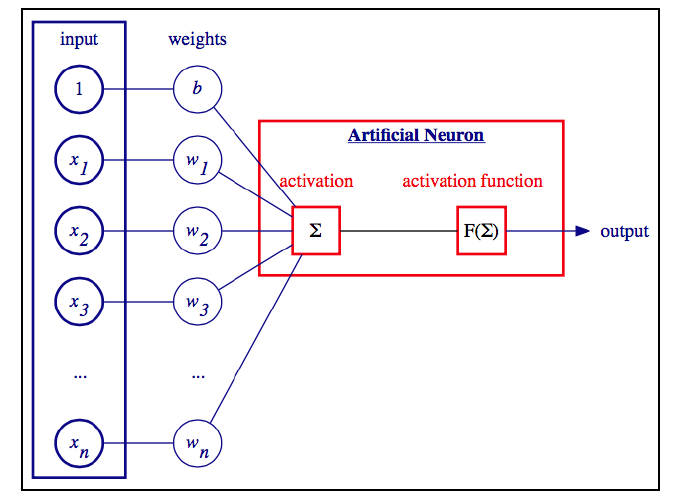

# Linearly separable data

If you recall, the perceptron was able to classify for the rest of the logic gates, but not XOR. What exactly makes XOR a problem that the perceptron is unable to tackle?
Hint: Try plotting the XOR function on a graph.

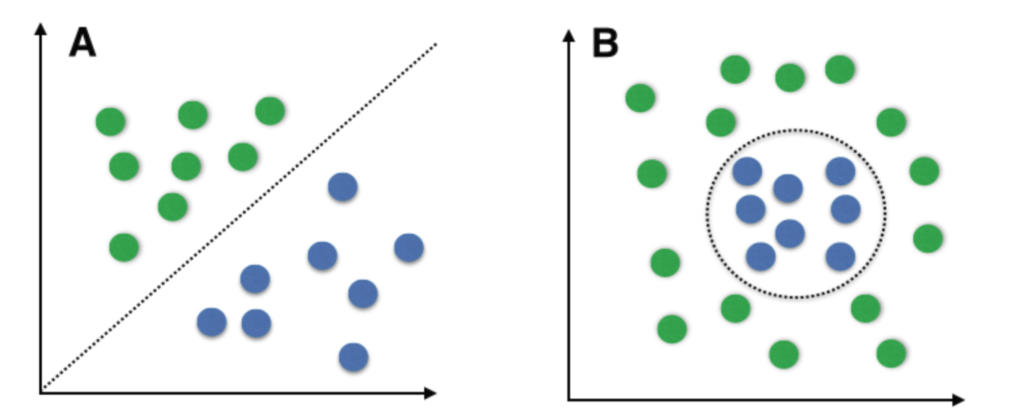

The answer relates to *linear separability* of the data.

# Limitations of linear models

Linear models may tend to go wrong at times and may not be good for the dataset we are dealing with. For example, they tend to encode a simple weaker assumption of *monotonicity*, ie, that increase in our feature must either always cause an increase in our model’s output (if the corresponding weight is positive), or always cause a decrease in our model’s output (if the corresponding weight is negative).
This assumption may not be good assumption at all times, and hence there is an inherent limitation in the power of these models to capture more complex relationships.

Our SLP, for example, cannot classify properly when we do not have linear separability of data.

# Introducing MLPs

We will now use several of the SLP neurons in a layer and stack several layers to create a multi-layered neural network. We see how this network is able to create a decision boundary for XOR, which our SLP could not.

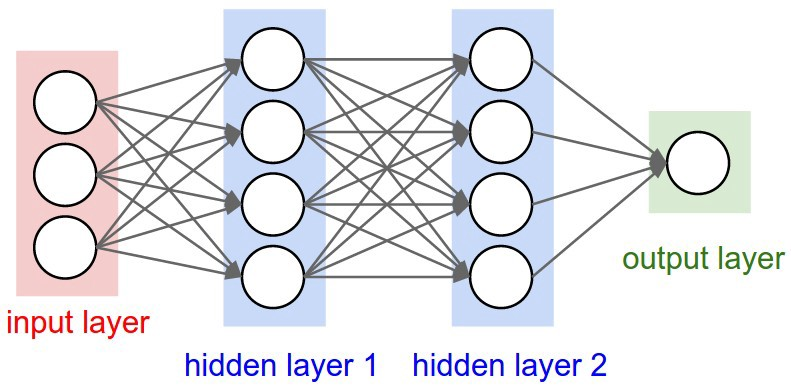

# Hidden Layers

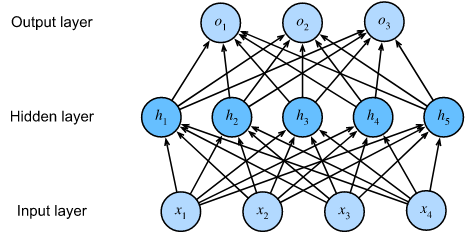

A more general class of functions than linear models can be handled by incorporating one or more hidden layers. We can do this by stacking many fully-connected layers on top of each other. Each layer feeds into the layer above it, until we generate outputs.

One way to think of this architecture is to think of it as the first $L - 1$ layers as creating a transformed representation of the data and the final layer as a linear predictor on this transformed representation.

# Stacking layers without non-linearities

Consider the diagram above.

By the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$, we denote a minibatch of n examples where each example has d inputs (features). For a one-hidden-layer MLP whose hidden layer has h hidden units, denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$ the outputs of the hidden layer, which are hidden representations. Since the hidden and output layers are both fully connected, we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$ and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. Formally, we calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$ of the one-hidden-layer MLP as follows:
\begin{split}\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}\end{split}

Note that after adding the hidden layer, our model now requires us to track and update additional sets of parameters. What advantage has this given us?

It might surprise you to find that there isn't really any advantage in terms of the expressiblity: our model is still ultimately linear.


We can view the equivalence formally by proving that for any values of the weights, we can just collapse out the hidden layer, yielding an equivalent single-layer model with parameters $\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:
$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$


# Introducing non-linearities

In order to realize the full potential of MLP, we need a key ingredient: a nonlinear activation function $\sigma$ to be applied to each hidden unit following the affine transformation. The outputs of activation functions (e.g., $\sigma(\cdot)$) are called activations. In general, with activation functions in place, it is no longer possible to collapse our MLP into a linear model:

$
\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}
$

Since each row in $\mathbf{X}$ corresponds to an example, with some abuse of notation, we define the nonlinearity $\sigma$ to apply to its inputs in a rowwise fashion, i.e., one example at a time.  

Often, the activation functions that we apply to hidden layers are not merely rowwise, but elementwise. That means that after computing the linear portion of the layer, we can calculate each activation without looking at the values taken by the other hidden units. This is true for most activation functions we look at

To build more general MLPs, we can continue stacking such hidden layers, e.g., $ \mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$, one atop another, yielding ever more expressive models.

# Activation functions

Let us take a look at a few of the activation functions we can use with MLPs.

## ReLU

$ \operatorname{ReLU}(x) = \max(x, 0) $

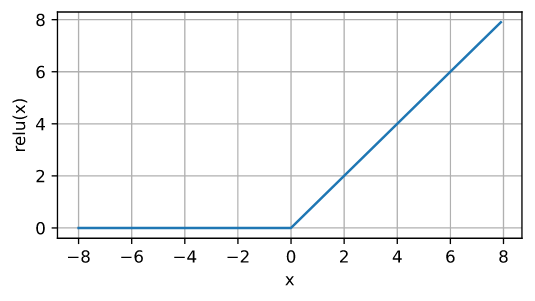

## Sigmoid

$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)} $

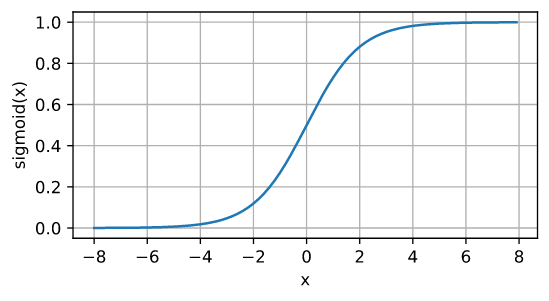

## tanh

$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)} $

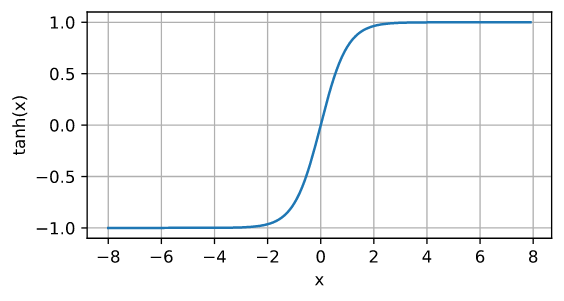

# Example MLP implementation in PyTorch

We now implement an MLP using pytorch and see how it can successfully find a decision boundary for the XOR problem, that our SLP could not solve earlier.

# Required imports

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Plotting code

In [ ]:
## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# Define the input data

In [ ]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


Define the Neural Network class `Net`

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True) 
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

# Initialize the weights

In [ ]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


# Define the loss function

In [ ]:
# Use a mean square error loss
loss_func = nn.MSELoss()

# Define optimizer

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Write the training routine

In [ ]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]
        
        optimizer.zero_grad()

        y_hat = model(x_var)
        
        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()
        
        optimizer.step()
        
    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.3395090103149414, 
Epoch: 500, Loss: 0.33328595757484436, 
Epoch: 1000, Loss: 0.17785687744617462, 
Epoch: 1500, Loss: 0.3138445019721985, 
Epoch: 2000, Loss: 0.2594497501850128, 
Epoch: 2500, Loss: 0.23258015513420105, 
Epoch: 3000, Loss: 0.2470337450504303, 
Epoch: 3500, Loss: 0.2289915829896927, 
Epoch: 4000, Loss: 0.2035052329301834, 
Epoch: 4500, Loss: 0.14066478610038757, 


# Check the output

In [ ]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [0.]


# Visualize the decision boundary

<ipython-input-2-d74ee9bebb86>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


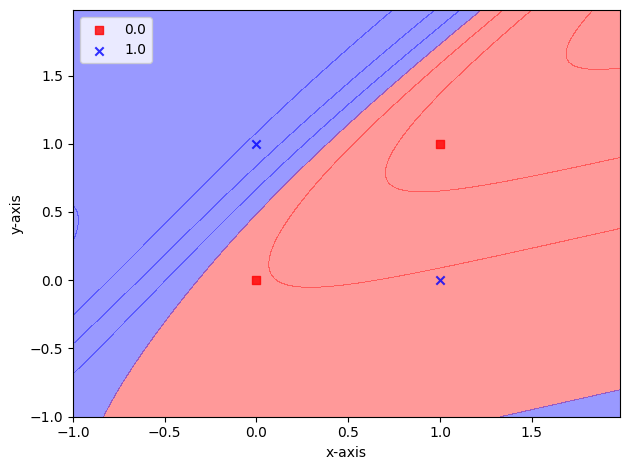

In [ ]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Exercises

1.  Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.
2.  Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?
3. Try removing the activation function from the MLP and rerun the code. What happens in this case?
  - Can you tell why particular activation function can be used in the model architecture?



1.Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.

The Multilayer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected perceptrons. Unlike the single-layer perceptron (SLP), the MLP can handle non-linearly separable data by using hidden layers with non-linear activation functions.

The MLP can be trained to classify various logic gates, including AND, OR, NOR, and NAND gates. Let's take a look at how the MLP can be used to classify these logic gates:

1. AND gate:
The AND gate has the following truth table:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 0      |
| 1       | 0       | 0      |
| 1       | 1       | 1      |

To train the MLP for the AND gate, we need to create a dataset with inputs (0, 0), (0, 1), (1, 0), and (1, 1) and corresponding outputs (0, 0, 0, 1). The MLP can then be trained on this dataset to learn the appropriate weights for classification.

2. OR gate:
The OR gate has the following truth table:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 1      |

Similar to the AND gate, we create a dataset with inputs (0, 0), (0, 1), (1, 0), and (1, 1) and corresponding outputs (0, 1, 1, 1) for the OR gate.

3. NOR gate:
The NOR gate has the following truth table:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 1      |
| 0       | 1       | 0      |
| 1       | 0       | 0      |
| 1       | 1       | 0      |

Again, we create a dataset with inputs (0, 0), (0, 1), (1, 0), and (1, 1) and corresponding outputs (1, 0, 0, 0) for the NOR gate.

By using an MLP with appropriate configurations, including the number of hidden layers and neurons, along with suitable activation functions, we can train the network on these datasets to classify the corresponding logic gates successfully.

In [ ]:
from sklearn.neural_network import MLPClassifier

# AND gate dataset
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# OR gate dataset
X_or = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_or = [0, 1, 1, 1]

# NOR gate dataset
X_nor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_nor = [1, 0, 0, 0]

# Create and train MLP classifiers for different logic gates
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', random_state=1)
mlp_and.fit(X_and, y_and)

mlp_or = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', random_state=1)
mlp_or.fit(X_or, y_or)

mlp_nor = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', random_state=1)
mlp_nor.fit(X_nor, y_nor)

# Test the classifiers
test_inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

print("AND gate predictions:")
print(mlp_and.predict(test_inputs))

print("OR gate predictions:")
print(mlp_or.predict(test_inputs))

print("NOR gate predictions:")
print(mlp_nor.predict(test_inputs))


2.Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?

When changing the 0/1 logic to -1/+1 logic, the behavior of both the Single-Layer Perceptron (SLP) and Multilayer Perceptron (MLP) can be affected. Let's discuss each case separately:

1. Single-Layer Perceptron (SLP):
In the case of the SLP, changing the logic from 0/1 to -1/+1 can still allow successful classification if the data remains linearly separable. The SLP updates its weights based on the signs of the predicted and target outputs. As long as the decision boundary remains the same, i.e., the same relative positioning of points, the SLP can still classify the data correctly. However, it is important to ensure that the thresholds and activation function are adjusted to accommodate the new -1/+1 logic.

2. Multilayer Perceptron (MLP):
Changing the logic from 0/1 to -1/+1 can affect the behavior of the MLP. The choice of activation functions becomes important since some activation functions, such as the Rectified Linear Unit (ReLU) and Sigmoid, are designed for the 0/1 logic range. ReLU, for example, maps negative inputs to 0, which may cause issues when using -1/+1 logic.

To adapt an MLP to the -1/+1 logic, you would need to consider the following adjustments:
- Change the target outputs to -1 and +1.
- Choose an appropriate activation function that handles the -1/+1 range, such as the hyperbolic tangent (tanh) activation function or a custom activation function that maps -1 to -1 and +1 to +1.
- Adjust the thresholds and activation function parameters accordingly.

Overall, both the SLP and MLP can still work with the -1/+1 logic as long as the data remains linearly separable for the SLP and appropriate adjustments are made to the activation functions and target outputs in the case of the MLP.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Logic gate datasets
X_and = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])

X_or = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_or = np.array([-1, 1, 1, 1])

# Convert target outputs to -1/+1 logic
y_and = np.where(y_and == 0, -1, 1)
y_or = np.where(y_or == 0, -1, 1)

# Single-Layer Perceptron (SLP)
slp_and = Perceptron(random_state=1)
slp_and.fit(X_and, y_and)

slp_or = Perceptron(random_state=1)
slp_or.fit(X_or, y_or)

# Multilayer Perceptron (MLP)
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='adam', random_state=1)
mlp_and.fit(X_and, y_and)

mlp_or = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='adam', random_state=1)
mlp_or.fit(X_or, y_or)

# Test the classifiers
test_inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])

print("Single-Layer Perceptron (SLP) - AND gate predictions:")
print(slp_and.predict(test_inputs))

print("Single-Layer Perceptron (SLP) - OR gate predictions:")
print(slp_or.predict(test_inputs))

print("Multilayer Perceptron (MLP) - AND gate predictions:")
print(mlp_and.predict(test_inputs))

print("Multilayer Perceptron (MLP) - OR gate predictions:")
print(mlp_or.predict(test_inputs))


3.Try removing the activation function from the MLP and rerun the code. What happens in this case?
Can you tell why particular activation function can be used in the model architecture?

If we remove the activation function from the Multilayer Perceptron (MLP) and rerun the code, the model would not be able to learn and capture non-linear relationships between the inputs and outputs effectively. The absence of an activation function would essentially turn the MLP into a linear model, similar to a single-layer perceptron.

By removing the activation function, the MLP would become a series of linear transformations, as each layer would only perform matrix multiplications and additions without introducing any non-linearity. Consequently, the model's ability to handle complex patterns and non-linear decision boundaries would be severely limited.

Activation functions introduce non-linear transformations to the outputs of individual neurons, allowing the model to learn and represent non-linear relationships within the data. Different activation functions possess different properties, and the choice of the activation function can have a significant impact on the model's performance. Here are a few commonly used activation functions and their properties:

1. Sigmoid: The sigmoid activation function maps the input to a range between 0 and 1. It is useful for binary classification problems and can model non-linear relationships. However, it suffers from the vanishing gradient problem for deep networks.

2. ReLU (Rectified Linear Unit): ReLU sets negative inputs to zero and keeps positive inputs unchanged. It is computationally efficient and helps mitigate the vanishing gradient problem. ReLU is widely used in deep learning architectures.

3. Tanh (Hyperbolic Tangent): Tanh activation function maps the input to the range between -1 and 1. It is useful for classification problems and can handle negative inputs. However, it also suffers from the vanishing gradient problem.

4. Softmax: Softmax is commonly used in multi-class classification problems. It converts the input values into probabilities, ensuring that the sum of the probabilities across all classes adds up to 1.

The choice of the activation function depends on the specific problem and the characteristics of the data. It is important to consider factors such as non-linearity, computational efficiency, vanishing/exploding gradients, and the nature of the problem being addressed. Different activation functions can yield different model behaviors and performance, so it is crucial to experiment and choose an appropriate activation function for the given task.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Logic gate datasets
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Single-Layer Perceptron (SLP)
slp_and = MLPClassifier(hidden_layer_sizes=(1,), activation='identity', solver='adam', random_state=1)
slp_and.fit(X_and, y_and)

slp_or = MLPClassifier(hidden_layer_sizes=(1,), activation='identity', solver='adam', random_state=1)
slp_or.fit(X_or, y_or)

# Test the SLP classifiers
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

print("Single-Layer Perceptron (SLP) - AND gate predictions:")
print(slp_and.predict(test_inputs))

print("Single-Layer Perceptron (SLP) - OR gate predictions:")
print(slp_or.predict(test_inputs))


# References and useful resources



1.   http://d2l.ai/chapter_multilayer-perceptrons/mlp.html
2.   [But what is a neural network? (3 Blue 1 Brown series)](https://www.youtube.com/watch?v=aircAruvnK)

